<a href="https://colab.research.google.com/github/Paul-mwaura/Zindi---Sentiment-Analysis_Tunisian-Arabizi/blob/main/Zindi_Sentiment_Analysis_Tunisian_Arabizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zindi - Sentiment Analysis_Tunisian Arabizi.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import re, string
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
#from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output

In [ ]:
df = pd.read_csv("Train.csv")
df.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1


In [ ]:
df.shape

(70000, 3)

In [ ]:
len(df['ID'].unique())

70000

In [ ]:
test = pd.read_csv("Test.csv")
test.head()

,ID,text
0,2DDHQW9,barcha aaindou fiha hak w barcha teflim kadhalik
1,5HY6UEY,ye gernabou ye 9a7ba
2,ATNVUJX,saber w barra rabbi m3ak 5ouya
3,Q9XYVOQ,cha3ébbb ta7aaaaannnnnnnnnnn tfouuhh
4,TOAHLRH,rabi y5alihoulek w yfar7ek bih w inchallah itc...


### Data Cleaning

In [ ]:
df.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1


In [ ]:
positive = df[df['label'] == 1]
negative = df[df['label'] == -1]

df = pd.concat([positive, negative], axis=0)
df.head(10)

,ID,text,label
3,U0TTYY8,ak slouma,1
5,OSTX8NX,hhhhhhhh blidaa minik ba3d doussieet athika il...,1
6,I1JT3SJ,wahdek big boss,1
9,2ZB3IIF,3omra ma9boula si slim,1
11,OUKCO8J,admin kifech najem nwali membre fi partie poli...,1
12,SK392WJ,mabrouk li tounes kolha bi monadhel felecitati...,1
14,8S87J83,ca maliha ken wlèd ha,1
21,QH26509,ina li elahi wa ina ilayhi raji3on allah yar7mo,1
22,CCUHTN5,b1 dit,1
23,8AUG5QP,bilehi fin tickeyet f parks w la,1


In [ ]:
df.isna().sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
test.isna().sum()

ID      0
text    0
dtype: int64

In [ ]:
test.duplicated().sum()

0

#### Explore Corpus Character Set

In [ ]:
from nltk import FreqDist
import re

In [ ]:
corpus_as_char_list = "".join(df.text.tolist())
print(type(corpus_as_char_list),len(corpus_as_char_list))

<class 'str'> 3908003


In [ ]:
fdist1 = FreqDist([c for c in corpus_as_char_list])

In [ ]:
print("number of characters:" + str(fdist1.N()))
print("number of unique characters:" + str(fdist1.B()))

number of characters:3908003
number of unique characters:114


In [ ]:
print('List of distinct characters:')
print(sorted(list(fdist1.keys())))

List of distinct characters:
[' ', "'", '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', 'A', 'B', 'C', 'E', 'F', 'H', 'J', 'K', 'L', 'M', 'O', 'R', 'S', 'W', 'Y', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '²', '³', '¹', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'ÿ', 'ā', 'ă', 'ć', 'ď', 'đ', 'ĕ', 'ė', 'ę', 'ě', 'į', 'ı', 'ķ', 'ĺ', 'ļ', 'ł', 'ő', 'œ', 'ŕ', 'ş', 'ȝ', 'ə', '١', '٧', '\ufeff']


In [ ]:
print('The most common characters:')
fdist1.most_common(5)

The most common characters:


[(' ', 602858), ('a', 512104), ('e', 265342), ('i', 253048), ('l', 225135)]

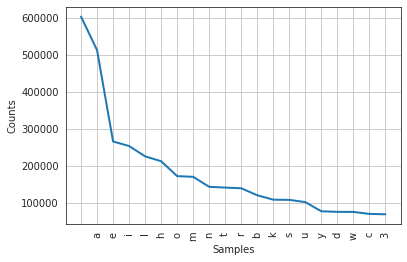

In [ ]:
fdist1.plot(20, cumulative=False)

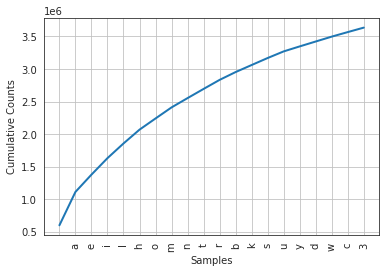

In [ ]:
fdist1.plot(20,cumulative=True)

In [ ]:
corpus_chars_df = pd.DataFrame(fdist1.items())
corpus_chars_df.columns = ['character','frequency']

# Unicode number of each distinct character:
corpus_chars_df['unicode_dec']= corpus_chars_df.character.map(ord)
corpus_chars_df['unicode_hex']= corpus_chars_df.character.map(lambda x: hex(ord(x)))

corpus_chars_df = corpus_chars_df.set_index('character')

corpus_chars_df.head()

,frequency,unicode_dec,unicode_hex
character,,,
a,512104,97,0x61
k,108044,107,0x6b
,602858,32,0x20
s,107505,115,0x73
l,225135,108,0x6c


In [ ]:
idx = corpus_chars_df.unicode_hex.str.startswith('0x60')
print(corpus_chars_df.shape[0],idx.sum())

114 0


In [ ]:

# Characters from the Standard Arabic Character set

corpus_chars_df[idx].sort_values(by='unicode_dec', ascending=True)

,frequency,unicode_dec,unicode_hex
character,,,


In [ ]:
# Characters from the Extended Arabic Character set

corpus_chars_df[~idx].sort_values(by='unicode_dec', ascending=True)

,frequency,unicode_dec,unicode_hex
character,,,
,602858,32,0x20
',62,39,0x27
-,5,45,0x2d
.,1,46,0x2e
0,5407,48,0x30
...,...,...,...
ȝ,1,541,0x21d
ə,1,601,0x259
١,1,1633,0x661


In [ ]:
# Rare characters

u = corpus_chars_df[corpus_chars_df.frequency<5]
print(u.shape[0])
#print(sorted(u.index.tolist()))
print(','.join(sorted(u.index.tolist())))

43
.,?,C,E,F,J,K,L,O,R,S,W,Y,²,³,¹,å,æ,ò,ó,õ,ý,ā,ă,ć,ď,đ,ĕ,ę,ě,į,ķ,ĺ,ļ,ł,ő,ŕ,ş,ȝ,ə,١,٧,﻿


In [ ]:

# Rare characters sorted by unicode value

u.sort_values(by='unicode_dec', ascending=True).head()

,frequency,unicode_dec,unicode_hex
character,,,
.,1,46,0x2e
?,2,63,0x3f
C,2,67,0x43
E,1,69,0x45
F,1,70,0x46


In [ ]:
u.sort_values(by='unicode_dec', ascending=False).head()

,frequency,unicode_dec,unicode_hex
character,,,
﻿,4,65279,0xfeff
٧,1,1639,0x667
١,1,1633,0x661
ə,1,601,0x259
ȝ,1,541,0x21d


**Select unwanted characters**

For this corpus, unwanted characters are characters in the standard Arabic character set.



In [ ]:
idx1 = corpus_chars_df.unicode_hex.str.startswith('0x6')
idx2 = (corpus_chars_df.frequency>=5)
idx1.sum(), idx2.sum(), (idx1&idx2).sum()

(17, 71, 15)

In [ ]:
unwanted_characters = sorted(corpus_chars_df.loc[~(idx1)].index.tolist())
print(len(unwanted_characters))

97


### Text Preprocessing

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    #text = re.sub('<.*?>+', '', text)
    #text = re.sub("s+"," ", text)
    #text = re.sub("[^-9A-Za-z ]", "" , text)
    return text

In [ ]:
def clean_text(text):
  #will replace the html characters with ""
  text = re.sub(r"[^A-Za-z0-9]", " ", text) 
  #To remove the punctuations
  text = text.translate(str.maketrans(' ',' ',string.punctuation))
  #will consider only alphabets and numerics
  text = re.sub('[^a-zA-Z]',' ',text) 
  # remove numbers 
  # text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) 
  #will replace newline with space
  text = re.sub("\n"," ",text)
  #will convert to lower case
  text = text.lower()
  # will split and join the words
  text=' '.join(text.split())

  return text

In [ ]:
df['text'] = df['text'].apply(lambda x:clean_text(x))
test['text'] = test['text'].apply(lambda x:clean_text(x))

In [ ]:
train = df.copy()
train.head(3)

,ID,text,label
3,U0TTYY8,ak slouma,1
5,OSTX8NX,hhhhhhhh blidaa minik ba d doussieet athika il...,1
6,I1JT3SJ,wahdek big boss,1


In [ ]:
train.shape

(67534, 3)

### Unwanted characters

In [ ]:
'''unwanted_characters_regexp = '[' + ''.join(unwanted_characters) + ']'
unwanted_characters_regexp'''

"unwanted_characters_regexp = '[' + ''.join(unwanted_characters) + ']'\nunwanted_characters_regexp"

In [ ]:
'''idx = train.text.map(lambda x: re.search(unwanted_characters_regexp,x)!=None)
idx.sum()'''

'idx = train.text.map(lambda x: re.search(unwanted_characters_regexp,x)!=None)\nidx.sum()'

In [ ]:
'''# Words that contain Arabic letters  (that will be removed)

print(train.loc[idx].text.tolist())'''

'# Words that contain Arabic letters  (that will be removed)\n\nprint(train.loc[idx].text.tolist())'

In [ ]:
'''train[idx].head()'''

'train[idx].head()'

### Modelling

#### Split data into train and test

In [ ]:
X = train['text']
y = train['label']

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
seed = 12
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.10, shuffle=True, random_state=0)
X.shape, y.shape

((67534,), (67534,))

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2


# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()

lr_clf = Pipeline([('vect', TfidfVectorizer(min_df= 5, sublinear_tf=True, norm='l2', ngram_range=(1, 4))), 
                   ('tfidf', TfidfTransformer()), 
                   ('chi',  SelectKBest(chi2, k=20000)),
                   ('clf', LogisticRegression())])

lr_clf = lr_clf.fit(X_train, y_train)

# Performance of NB Classifier
import numpy as np
predicted = lr_clf.predict(X_test)
print(f"------------------\n{np.mean(predicted == y_test)*100}\n------------------")


------------------
81.44803079656499
------------------


In [ ]:
from sklearn.svm import SVC

svm = SVC()
tfidf = TfidfVectorizer()

svm_clf = Pipeline([('vect', CountVectorizer()), 
                   ('tfidf', TfidfTransformer()), 
                   ('clf', SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])

svm = svm_clf.fit(X_train, y_train)

# Performance of NB Classifier
import numpy as np
predicted = svm_clf.predict(X_test)
print(f"------------------\n{np.mean(predicted == y_test)*100}\n------------------")


------------------
81.52206100088836
------------------


### Tokenization

In [ ]:
X_train.shape, y_train.shape

((54027,), (54027,))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout

MAX_NB_WORDS = 20000

# get the raw text data
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 107910 unique tokens.


In [ ]:
sequences[0]

[10901, 50, 1309, 18805, 28, 6807]

The tokenizer object stores a mapping (vocabulary) from word strings to token ids that can be inverted to reconstruct the original message (without formatting):

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 107910)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

'abdeli li ten ound y tème'

Let's have a closer look at the tokenized sequences:

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 8.7
max length: 1531


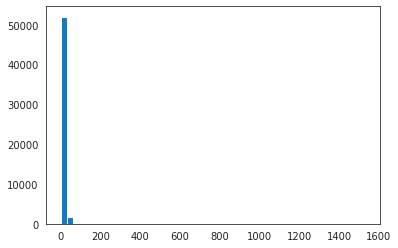

In [ ]:
%matplotlib inline
plt.hist(seq_lens, bins=50);

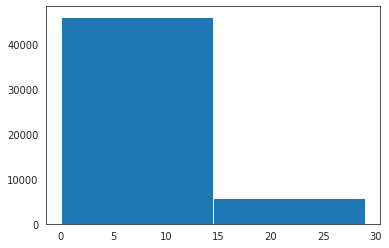

In [ ]:
plt.hist([l for l in seq_lens if l < 30], bins=2);

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54027,)
(54027,)
(13507,)
(13507,)


#### SDGClassifier

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-9, max_iter=3, shuffle=True, random_state=0))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
print(f"------------------\n{np.mean(predicted_svm == y_test)*100}\n------------------")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


------------------
78.1150514548012
------------------


#### MultinomialNB

In [ ]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)


# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)

# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)*100

80.61793593603474

SDG Classifier

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.7729134790977741

### Submission

In [ ]:
sub = pd.read_csv("SampleSubmission.csv")
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission.head()

,ID
0,2DDHQW9
1,5HY6UEY
2,ATNVUJX
3,Q9XYVOQ
4,TOAHLRH


In [ ]:
submission.shape

(30000, 1)

In [ ]:
pred = lr_clf.predict(test['text'])
pred

array([ 1, -1,  1, ...,  1, -1,  1])

In [ ]:
len(pred)

30000

The index is still there, so we will set the column ID as the dataframe index.

In [ ]:
submission['label'] = pred
submission.set_index('ID', inplace=True)

In [ ]:
submission.head()

,label
ID,
2DDHQW9,1
5HY6UEY,-1
ATNVUJX,1
Q9XYVOQ,-1
TOAHLRH,1


We have successfully replaced the index with the column ID.
Now Let us create our submission file.

In [ ]:
submission.to_csv("lr_submission.csv")